In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sql_functions as sf
import psycopg2

In [14]:
ger_dest_cont = pd.read_csv('data/ger_dest_cont.csv', delimiter=';', encoding='latin1')

In [15]:
ger_dest_cont.head(10)

,Europe,Africa,Asia,America,Australia and Oceania
2012,71664311,2648012,3966343,4244060,x
2013,75218018,3085035,4278892,4528155,x
2014,71851324,3047756,3925565,3826949,x
2015,73199426,2565442,3523335,4010395,x
2016,79015618,2169551,5146279,4243673,x
2017,77013761,3882200,5421768,5356388,x
2018,93447192,4300153,5599372,4830714,x
2019,84585790,3663327,5807010,4587480,889360
2020,33969070,788390,1044897,1030261,x
2021,45505024,1098279,1037308,1026728,-


In [16]:
ger_dest_cont['cont_total'] = ger_dest_cont.sum(axis=1)

/var/folders/lq/66qmb5qs6yx8s8h1s8rmqnh80000gn/T/ipykernel_8947/955954610.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ger_dest_cont['cont_total'] = ger_dest_cont.sum(axis=1)


In [17]:
ger_dest_cont.head(10)

,Europe,Africa,Asia,America,Australia and Oceania,cont_total
2012,71664311,2648012,3966343,4244060,x,82522726
2013,75218018,3085035,4278892,4528155,x,87110100
2014,71851324,3047756,3925565,3826949,x,82651594
2015,73199426,2565442,3523335,4010395,x,83298598
2016,79015618,2169551,5146279,4243673,x,90575121
2017,77013761,3882200,5421768,5356388,x,91674117
2018,93447192,4300153,5599372,4830714,x,108177431
2019,84585790,3663327,5807010,4587480,889360,98643607
2020,33969070,788390,1044897,1030261,x,36832618
2021,45505024,1098279,1037308,1026728,-,48667339


<Axes: >

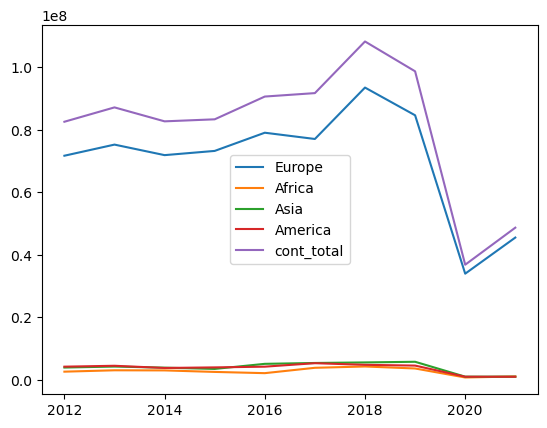

In [26]:
ger_dest_cont.plot()

In [18]:
ger_dest_country = pd.read_csv('data/ger_dest_country.csv', delimiter=';', encoding='latin1')

In [19]:
ger_dest_country.head(10)

,Belgium,Bulgaria,Denmark,Estonia,Finland,France,Greece,Ireland,Iceland,Italy,...,Slovakia,Slovenia,Spain,Czechia,Turkey,Ukraine,Hungary,United Kingdom,Cyprus,Rest of Europe
2012,1081792,x,1990672,x,x,5525894,1371712,x,x,10734702,...,x,x,9956971,2447165,4617678,x,1157818,2188117,x,x
2013,1286893,532448,1656946,x,x,5222570,1907569,816946,x,10471824,...,x,x,9972999,1708549,4991780,x,1199237,4088788,x,710113
2014,1339362,x,2342399,x,x,5472093,2363798,608565,x,9485428,...,x,x,9143204,1632543,4893317,x,529065,2640606,x,1080462
2015,1169903,x,1881482,x,x,4837612,1563361,613248,x,10645721,...,x,x,10242453,2199242,4316205,x,1098884,3252563,x,859711
2016,1009253,1028722,1909579,x,x,5158745,2503954,684025,x,11548473,...,x,x,10392755,1854060,3344637,x,1158709,3178819,x,1034788
2017,1035849,x,1733186,x,x,6231466,2836539,823927,x,10972666,...,x,x,11092772,2477260,2613340,x,728394,3380327,x,745936
2018,1467885,718052,1938469,x,x,6143331,3297186,1119241,x,13572692,...,x,x,11671678,2630516,3815798,x,889534,4343738,x,964873
2019,1523551,623274,2713653,x,x,6467657,3210225,748310,x,11633147,...,x,x,10984639,2728299,3205210,x,1385049,2981999,x,715584
2020,500305,x,1060487,x,x,2653406,935316,x,x,4151171,...,x,x,2716432,831259,x,-,x,x,x,x
2021,644750,x,1328161,-,x,3383096,2042277,x,x,7551822,...,x,x,5414450,868133,1663875,x,x,x,x,x


In [20]:
ger_dest_country['total'] = ger_dest_country.sum(axis=1)

/var/folders/lq/66qmb5qs6yx8s8h1s8rmqnh80000gn/T/ipykernel_8947/28258893.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ger_dest_country['total'] = ger_dest_country.sum(axis=1)


In [21]:
ger_dest_country

,Belgium,Bulgaria,Denmark,Estonia,Finland,France,Greece,Ireland,Iceland,Italy,...,Slovenia,Spain,Czechia,Turkey,Ukraine,Hungary,United Kingdom,Cyprus,Rest of Europe,total
2012,1081792,x,1990672,x,x,5525894,1371712,x,x,10734702,...,x,9956971,2447165,4617678,x,1157818,2188117,x,x,57911981
2013,1286893,532448,1656946,x,x,5222570,1907569,816946,x,10471824,...,x,9972999,1708549,4991780,x,1199237,4088788,x,710113,57885649
2014,1339362,x,2342399,x,x,5472093,2363798,608565,x,9485428,...,x,9143204,1632543,4893317,x,529065,2640606,x,1080462,56770471
2015,1169903,x,1881482,x,x,4837612,1563361,613248,x,10645721,...,x,10242453,2199242,4316205,x,1098884,3252563,x,859711,57662365
2016,1009253,1028722,1909579,x,x,5158745,2503954,684025,x,11548473,...,x,10392755,1854060,3344637,x,1158709,3178819,x,1034788,62051675
2017,1035849,x,1733186,x,x,6231466,2836539,823927,x,10972666,...,x,11092772,2477260,2613340,x,728394,3380327,x,745936,62983906
2018,1467885,718052,1938469,x,x,6143331,3297186,1119241,x,13572692,...,x,11671678,2630516,3815798,x,889534,4343738,x,964873,74576832
2019,1523551,623274,2713653,x,x,6467657,3210225,748310,x,11633147,...,x,10984639,2728299,3205210,x,1385049,2981999,x,715584,68527506
2020,500305,x,1060487,x,x,2653406,935316,x,x,4151171,...,x,2716432,831259,x,-,x,x,x,x,29831929
2021,644750,x,1328161,-,x,3383096,2042277,x,x,7551822,...,x,5414450,868133,1663875,x,x,x,x,x,39453981


<Axes: >

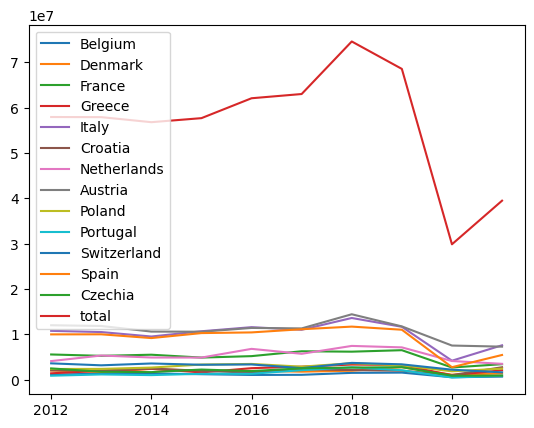

In [22]:
ger_dest_country.plot()

In [23]:
ger_trans = pd.read_csv('data/ger_transport.csv', delimiter=';', encoding='latin1')

In [24]:
ger_trans

,Airplane,Ship,Train,Bus,Motor vehicle,Other means of transport
2012,40754905,3366728,34819832,11878291,149725223,6979006
2013,41735644,3141468,34662822,14340007,149111016,5591062
2014,39370171,2947322,34110002,11952531,144536865,3993056
2015,39885520,2787698,32311342,15863473,152227500,4800413
2016,43856798,2976491,38957292,16591207,147231057,6035232
2017,45972060,3507190,35025166,14383199,139804287,4885207
2018,49138652,3987513,37168879,13239594,156575466,7769007
2019,43326257,4150904,41222411,12361317,153776487,5680510
2020,11565999,913470,21921470,2396251,106579346,2785876
2021,15356393,1472621,30627940,4675576,122135673,3890087


<Axes: >

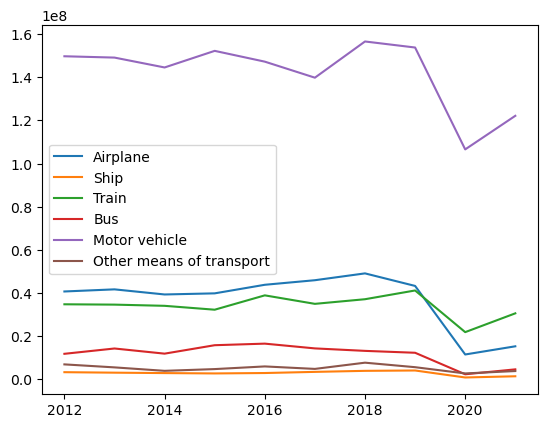

In [25]:
ger_trans.plot()

In [10]:
ger_trans['trans_total'] = ger_trans.sum(axis=1)

In [11]:
ger_trans

,Airplane,Ship,Train,Bus,Motor vehicle,Other means of transport,trans_total
2012,40754905,3366728,34819832,11878291,149725223,6979006,247523985
2013,41735644,3141468,34662822,14340007,149111016,5591062,248582019
2014,39370171,2947322,34110002,11952531,144536865,3993056,236909947
2015,39885520,2787698,32311342,15863473,152227500,4800413,247875946
2016,43856798,2976491,38957292,16591207,147231057,6035232,255648077
2017,45972060,3507190,35025166,14383199,139804287,4885207,243577109
2018,49138652,3987513,37168879,13239594,156575466,7769007,267879111
2019,43326257,4150904,41222411,12361317,153776487,5680510,260517886
2020,11565999,913470,21921470,2396251,106579346,2785876,146162412
2021,15356393,1472621,30627940,4675576,122135673,3890087,178158290


In [27]:
german_travel_df = pd.concat([ger_dest_cont, ger_dest_country, ger_trans], axis=1)

In [28]:
german_travel_df

,Europe,Africa,Asia,America,Australia and Oceania,cont_total,Belgium,Bulgaria,Denmark,Estonia,...,United Kingdom,Cyprus,Rest of Europe,total,Airplane,Ship,Train,Bus,Motor vehicle,Other means of transport
2012,71664311,2648012,3966343,4244060,x,82522726,1081792,x,1990672,x,...,2188117,x,x,57911981,40754905,3366728,34819832,11878291,149725223,6979006
2013,75218018,3085035,4278892,4528155,x,87110100,1286893,532448,1656946,x,...,4088788,x,710113,57885649,41735644,3141468,34662822,14340007,149111016,5591062
2014,71851324,3047756,3925565,3826949,x,82651594,1339362,x,2342399,x,...,2640606,x,1080462,56770471,39370171,2947322,34110002,11952531,144536865,3993056
2015,73199426,2565442,3523335,4010395,x,83298598,1169903,x,1881482,x,...,3252563,x,859711,57662365,39885520,2787698,32311342,15863473,152227500,4800413
2016,79015618,2169551,5146279,4243673,x,90575121,1009253,1028722,1909579,x,...,3178819,x,1034788,62051675,43856798,2976491,38957292,16591207,147231057,6035232
2017,77013761,3882200,5421768,5356388,x,91674117,1035849,x,1733186,x,...,3380327,x,745936,62983906,45972060,3507190,35025166,14383199,139804287,4885207
2018,93447192,4300153,5599372,4830714,x,108177431,1467885,718052,1938469,x,...,4343738,x,964873,74576832,49138652,3987513,37168879,13239594,156575466,7769007
2019,84585790,3663327,5807010,4587480,889360,98643607,1523551,623274,2713653,x,...,2981999,x,715584,68527506,43326257,4150904,41222411,12361317,153776487,5680510
2020,33969070,788390,1044897,1030261,x,36832618,500305,x,1060487,x,...,x,x,x,29831929,11565999,913470,21921470,2396251,106579346,2785876
2021,45505024,1098279,1037308,1026728,-,48667339,644750,x,1328161,-,...,x,x,x,39453981,15356393,1472621,30627940,4675576,122135673,3890087


In [29]:
german_travel_df.rename(columns=lambda x : x.lower(), inplace=True)
german_travel_df.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)

In [30]:
german_travel_df.columns

Index(['europe', 'africa', 'asia', 'america', 'australia_and_oceania',
       'cont_total', 'belgium', 'bulgaria', 'denmark', 'estonia', 'finland',
       'france', 'greece', 'ireland', 'iceland', 'italy', 'croatia', 'latvia',
       'lithuania', 'luxembourg', 'malta', 'netherlands', 'norway', 'austria',
       'poland', 'portugal', 'romania', 'russian_federation', 'sweden',
       'switzerland', 'slovakia', 'slovenia', 'spain', 'czechia', 'turkey',
       'ukraine', 'hungary', 'united_kingdom', 'cyprus', 'rest_of_europe',
       'total', 'airplane', 'ship', 'train', 'bus', 'motor_vehicle',
       'other_means_of_transport'],
      dtype='object')

In [31]:
country_columns = ['belgium', 
                   'bulgaria', 
                   'denmark', 
                   'estonia', 
                   'finland',
                    'france', 
                    'greece', 
                    'ireland', 
                    'iceland', 
                    'italy', 
                    'croatia', 
                    'latvia',
                    'lithuania', 
                    'luxembourg', 
                    'malta', 
                    'netherlands', 
                    'norway', 
                    'austria',
                    'poland', 
                    'portugal', 
                    'romania', 
                    'russian_federation', 
                    'sweden',
                    'switzerland', 
                    'slovakia', 
                    'slovenia', 
                    'spain', 
                    'czechia', 
                    'turkey',
                    'ukraine', 
                    'hungary', 
                    'united_kingdom', 
                    'cyprus', 
                    'rest_of_europe']

In [35]:
from country_iso_dict import country_iso_dict

In [38]:
country_iso_dict = {key.lower(): value for key, value in country_iso_dict.items()}

In [39]:
for i in country_columns:
    german_travel_df.rename(columns=country_iso_dict, inplace=True)

In [40]:
german_travel_df.columns

Index(['europe', 'africa', 'asia', 'america', 'australia_and_oceania',
       'cont_total', 'BEL', 'BGR', 'DNK', 'EST', 'FIN', 'FRA', 'GRC', 'IRL',
       'ISL', 'ITA', 'HRV', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'NOR', 'AUT',
       'POL', 'PRT', 'ROU', 'russian_federation', 'SWE', 'CHE', 'SVK', 'SVN',
       'ESP', 'czechia', 'TUR', 'UKR', 'HUN', 'united_kingdom', 'CYP',
       'rest_of_europe', 'total', 'airplane', 'ship', 'train', 'bus',
       'motor_vehicle', 'other_means_of_transport'],
      dtype='object')

In [42]:
german_travel_df.rename(columns={'russian_federation':'RUS','czechia':'CZE', 'united_kingdom':'GBR'}, inplace=True)

In [43]:
german_travel_df.columns

Index(['europe', 'africa', 'asia', 'america', 'australia_and_oceania',
       'cont_total', 'BEL', 'BGR', 'DNK', 'EST', 'FIN', 'FRA', 'GRC', 'IRL',
       'ISL', 'ITA', 'HRV', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'NOR', 'AUT',
       'POL', 'PRT', 'ROU', 'RUS', 'SWE', 'CHE', 'SVK', 'SVN', 'ESP', 'CZE',
       'TUR', 'UKR', 'HUN', 'GBR', 'CYP', 'rest_of_europe', 'total',
       'airplane', 'ship', 'train', 'bus', 'motor_vehicle',
       'other_means_of_transport'],
      dtype='object')

In [44]:
german_travel_df.to_csv('data/german_travel_data')

In [2]:
schema = 'capstone_travel_index'
engine = sf.get_engine()

In [4]:
table_name = 'german_travel_df'

if engine!=None:
    try:
        german_travel_df.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None